In [1]:
print(1+2)

3


#### **Superdense Coding**

Superdense coding allows Alice to send 2 classical bits of information to Bob by sending only 1 qubit, using shared entanglement.

- In teleportation → classical communication is allowed, quantum state is sent.
- In superdense coding → no classical communication, but Alice can send her qubit, and together they recover 2 classical bits.

<img src="superdense.png" width="800" height="600">




<br>

---

**Protocol**

**Setup**
- Alice has two classical bits: `a₁a₂ ∈ {00, 01, 10, 11}`
- Alice and Bob share a Bell pair:

<br>

---

1. Alice encodes her two bits
Depending on the value of `a₁a₂`, Alice performs:
      - 00 → Do nothing
      - 01 → Apply Z
      - 10 → Apply X
      - 11 → Apply X then Z

<br>

2. Alice sends her qubit to Bob
      - Now Bob holds both qubits.

<br>

3. Bob decodes the message
      - Bob performs:
            1. CNOT (Alice's qubit = control, Bob's = target)
            2. Hadamard on Alice's qubit
            3. Measure both qubits

The measurement yields exactly the two bits `a₁a₂`.

<br>

---

**Result Mapping**

| Alice’s bits | Alice’s operation | Final measured state (Bob)  |
|--------------|-------------------|-----------------------------|
|     00       |        I          |        00                   |
|     01       |        Z          |        01                   |
|     10       |        X          |        10                   |
|     11       |        XZ         |        11                   |

<br>

---

/Users/shyam/Documents/Quantum Projects/qiskit_venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


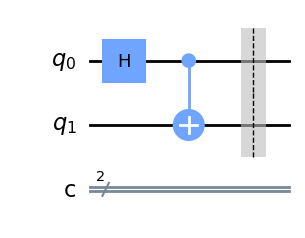

In [5]:
from qiskit import QuantumCircuit


qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.barrier()
qc.draw("mpl")

In [6]:
msg = "10"

/Users/shyam/Documents/Quantum Projects/qiskit_venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


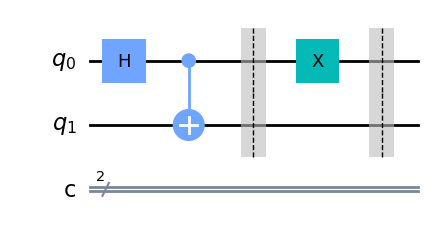

In [7]:

if msg == "00":
    pass
elif msg == "10":
    qc.x(0)
elif msg == "01":
    qc.z(0)
elif msg == "11":
    qc.z(0)
    qc.x(0)
qc.barrier()
qc.draw("mpl")

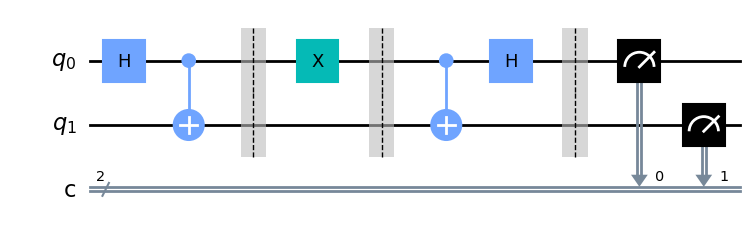

In [8]:
qc.cx(0, 1)
qc.h(0)
qc.barrier()

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw(output="mpl")

{'10': 1000}


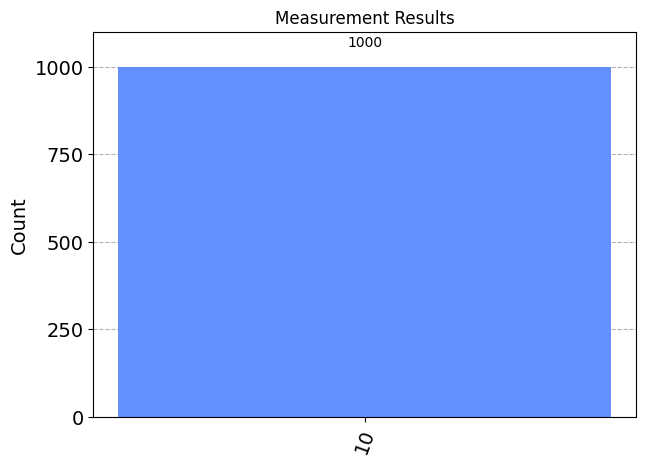

In [9]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Backend
backend = AerSimulator()
shots = 1000

# Transpile circuit
tqc = transpile(qc, backend=backend, optimization_level=1)

# Run simulation
job = backend.run(tqc, shots=shots)
result = job.result()

# Get counts
counts = result.get_counts()
print(counts)
plot_histogram(counts, title="Measurement Results")
